In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#한글 위한 글씨체 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/trutype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#구글 드라이브 마운트
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#경로이동
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
localurl='2020_7_B.csv' #분당 2020년 7월 데이터
localurl_10='2020_10_B.csv' #분당 2020년 10월 데이터
localurl_9='2020_9_B.csv' #분당 2020년 9월 데이터
try:
  df=pd.read_csv(localurl)
  df_10=pd.read_csv(localurl_10)
  df_9=pd.read_csv(localurl_9)
except OSError as err:
  print("error", format(err))#오류시 에러메시지

In [ ]:
df.shape

(1399, 12)

In [ ]:
df_10.shape

(771, 12)

In [ ]:
df_9.shape

(940, 12)

분당 2020년 7월 분석 시작

In [ ]:
#원룸등은 제외하기 위해서 전용면적 100 이상으로 제한을 둠
df_area=df[df['전용면적']>=100]
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,1992,2020,분당동,"60,000",샛별마을(동성),7,0,3,101.880,35,41135,4
4,1993,2020,분당동,"63,000",샛별마을(동성),7,0,4,133.650,35,41135,18
5,1993,2020,분당동,"75,000",샛별마을(라이프),7,0,4,126.415,34,41135,8
6,1993,2020,분당동,"57,000",장안타운(건영),7,0,4,101.820,66,41135,9
8,1993,2020,분당동,"80,000",샛별마을(삼부),7,0,8,128.090,39,41135,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2009,2020,운중동,"70,000",산운마을14단지(경남아너스빌),7,0,16,115.500,916,41135,2
1371,2009,2020,운중동,"83,000",산운마을6단지(주공휴먼시아),7,0,18,101.200,988,41135,9
1383,2009,2020,운중동,"65,000",산운마을14단지(경남아너스빌),7,0,22,101.250,916,41135,17
1384,2009,2020,운중동,"15,000",산운마을14단지(경남아너스빌),7,220,23,115.530,916,41135,5


In [ ]:
df_area.shape

(337, 12)

In [ ]:
#전용면적의 type 확인
type('전용면적')

str

In [ ]:
#월세금액의 type 확인
type('월세금액')

str

In [ ]:
#월세금액을 int형으로 변환
df_area['월세금액']=pd.to_numeric(df_area['월세금액'])
df_area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,1992,2020,분당동,"60,000",샛별마을(동성),7,0,3,101.880,35,41135,4
4,1993,2020,분당동,"63,000",샛별마을(동성),7,0,4,133.650,35,41135,18
5,1993,2020,분당동,"75,000",샛별마을(라이프),7,0,4,126.415,34,41135,8
6,1993,2020,분당동,"57,000",장안타운(건영),7,0,4,101.820,66,41135,9
8,1993,2020,분당동,"80,000",샛별마을(삼부),7,0,8,128.090,39,41135,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2009,2020,운중동,"70,000",산운마을14단지(경남아너스빌),7,0,16,115.500,916,41135,2
1371,2009,2020,운중동,"83,000",산운마을6단지(주공휴먼시아),7,0,18,101.200,988,41135,9
1383,2009,2020,운중동,"65,000",산운마을14단지(경남아너스빌),7,0,22,101.250,916,41135,17
1384,2009,2020,운중동,"15,000",산운마을14단지(경남아너스빌),7,220,23,115.530,916,41135,5


In [ ]:
#월세금액 자료형 확인
df_area['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area['보증금액']=df_area['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area['보증금액']=pd.to_numeric(df_area['보증금액'])
df_area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,1992,2020,분당동,60000,샛별마을(동성),7,0,3,101.880,35,41135,4
4,1993,2020,분당동,63000,샛별마을(동성),7,0,4,133.650,35,41135,18
5,1993,2020,분당동,75000,샛별마을(라이프),7,0,4,126.415,34,41135,8
6,1993,2020,분당동,57000,장안타운(건영),7,0,4,101.820,66,41135,9
8,1993,2020,분당동,80000,샛별마을(삼부),7,0,8,128.090,39,41135,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2009,2020,운중동,70000,산운마을14단지(경남아너스빌),7,0,16,115.500,916,41135,2
1371,2009,2020,운중동,83000,산운마을6단지(주공휴먼시아),7,0,18,101.200,988,41135,9
1383,2009,2020,운중동,65000,산운마을14단지(경남아너스빌),7,0,22,101.250,916,41135,17
1384,2009,2020,운중동,15000,산운마을14단지(경남아너스빌),7,220,23,115.530,916,41135,5


In [ ]:
#보증금액 자료형 확인
df_area['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area=df_area[df_area['월세금액']==0]
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,1992,2020,분당동,60000,샛별마을(동성),7,0,3,101.880,35,41135,4
4,1993,2020,분당동,63000,샛별마을(동성),7,0,4,133.650,35,41135,18
5,1993,2020,분당동,75000,샛별마을(라이프),7,0,4,126.415,34,41135,8
6,1993,2020,분당동,57000,장안타운(건영),7,0,4,101.820,66,41135,9
8,1993,2020,분당동,80000,샛별마을(삼부),7,0,8,128.090,39,41135,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1366,2009,2020,운중동,65000,산운마을14단지(경남아너스빌),7,0,16,101.140,916,41135,3
1367,2009,2020,운중동,70000,산운마을14단지(경남아너스빌),7,0,16,115.500,916,41135,2
1371,2009,2020,운중동,83000,산운마을6단지(주공휴먼시아),7,0,18,101.200,988,41135,9
1383,2009,2020,운중동,65000,산운마을14단지(경남아너스빌),7,0,22,101.250,916,41135,17


In [ ]:
df_area=df_area.sort_values(by=['전용면적'], axis=0, ascending=True)

In [ ]:
#다른 달과 분석할 데이터 개수 통일 하기 위해서 147개 탈락시킴
df_area=df_area[:-147]

In [ ]:
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
934,2009,2020,삼평동,79000,봇들마을9단지(금호어울림),7,0,27,101.00,744,41135,4
826,2009,2020,판교동,77000,판교원마을5단지(푸르지오),7,0,15,101.06,634,41135,10
871,2009,2020,삼평동,85000,봇들마을9단지(금호어울림),7,0,1,101.13,744,41135,6
1366,2009,2020,운중동,65000,산운마을14단지(경남아너스빌),7,0,16,101.14,916,41135,3
1069,2009,2020,백현동,85000,백현마을8단지(대림)임대,7,0,23,101.17,558,41135,6
...,...,...,...,...,...,...,...,...,...,...,...,...
157,1995,2020,정자동,80000,상록마을(우성)1,7,0,2,129.72,121,41135,16
330,1995,2020,정자동,75000,상록마을(우성)1,7,0,27,129.72,121,41135,14
332,1995,2020,정자동,75000,상록마을(우성)1,7,0,28,129.72,121,41135,23
148,1995,2020,정자동,85000,상록마을(우성)1,7,0,1,129.72,121,41135,2


In [ ]:
#보증금액의 평균
df_mean=df_area[['보증금액','월세금액','전용면적']]
df_mean.mean()

보증금액    74610.595238
월세금액        0.000000
전용면적      111.833669
dtype: float64

분당 2020년 10월 분석 시작

In [ ]:
df_area_10=df_10[df_10['전용면적']>=100]
df_area_10

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
12,1994,2020,분당동,"50,000",장안타운(건영),10,0,20,131.760,66,41135,19
14,1994,2020,분당동,"85,000",샛별마을(우방),10,0,21,101.960,38,41135,11
20,1992,2020,수내동,"73,500",양지마을(2단지)(청구),10,0,2,173.965,36,41135,1
21,1992,2020,수내동,"120,000",푸른마을(쌍용),10,0,6,176.770,75,41135,15
24,1992,2020,수내동,"25,000",양지마을(5단지)(한양515-529),10,80,7,134.550,24,41135,9
...,...,...,...,...,...,...,...,...,...,...,...,...
742,1995,2020,구미동,"56,000",까치마을(3단지)(신원),10,0,31,101.860,66,41135,1
745,2009,2020,운중동,"66,000",산운마을14단지(경남아너스빌),10,0,6,101.250,916,41135,16
749,2009,2020,운중동,"40,000",산운마을6단지(주공휴먼시아),10,180,9,101.120,988,41135,10
752,2009,2020,운중동,"40,000",산운마을6단지(주공휴먼시아),10,180,9,101.120,988,41135,10


In [ ]:
#월세금액 자료형 확인
df_area_10['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액 자료형 확인
df_area_10['보증금액'].dtypes

dtype('O')

In [ ]:
#보증금액 콤마 지우기
df_area_10['보증금액']=df_area_10['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area_10['보증금액']=pd.to_numeric(df_area_10['보증금액'])
df_area_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
12,1994,2020,분당동,50000,장안타운(건영),10,0,20,131.760,66,41135,19
14,1994,2020,분당동,85000,샛별마을(우방),10,0,21,101.960,38,41135,11
20,1992,2020,수내동,73500,양지마을(2단지)(청구),10,0,2,173.965,36,41135,1
21,1992,2020,수내동,120000,푸른마을(쌍용),10,0,6,176.770,75,41135,15
24,1992,2020,수내동,25000,양지마을(5단지)(한양515-529),10,80,7,134.550,24,41135,9
...,...,...,...,...,...,...,...,...,...,...,...,...
742,1995,2020,구미동,56000,까치마을(3단지)(신원),10,0,31,101.860,66,41135,1
745,2009,2020,운중동,66000,산운마을14단지(경남아너스빌),10,0,6,101.250,916,41135,16
749,2009,2020,운중동,40000,산운마을6단지(주공휴먼시아),10,180,9,101.120,988,41135,10
752,2009,2020,운중동,40000,산운마을6단지(주공휴먼시아),10,180,9,101.120,988,41135,10


In [ ]:
#보증금액 자료형 다시 확인
df_area_10['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area_10=df_area_10[df_area_10['월세금액']==0]
df_area_10

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
12,1994,2020,분당동,50000,장안타운(건영),10,0,20,131.760,66,41135,19
14,1994,2020,분당동,85000,샛별마을(우방),10,0,21,101.960,38,41135,11
20,1992,2020,수내동,73500,양지마을(2단지)(청구),10,0,2,173.965,36,41135,1
21,1992,2020,수내동,120000,푸른마을(쌍용),10,0,6,176.770,75,41135,15
31,1993,2020,수내동,90000,파크타운(삼익),10,0,8,184.780,54,41135,28
...,...,...,...,...,...,...,...,...,...,...,...,...
690,1995,2020,구미동,55000,까치마을(1단지)(대우롯데선경),10,0,9,134.830,77,41135,11
698,1996,2020,구미동,65000,무지개(10단지)(삼성),10,0,12,134.970,222,41135,8
704,1995,2020,구미동,100000,까치마을(4단지)(롯데),10,0,14,134.830,63,41135,6
742,1995,2020,구미동,56000,까치마을(3단지)(신원),10,0,31,101.860,66,41135,1


In [ ]:
#보증금액의 평균
df_mean_10=df_area_10[['보증금액','월세금액','전용면적']]
df_mean_10.mean()

보증금액    80638.333333
월세금액        0.000000
전용면적      131.535591
dtype: float64

분당 2020년 9월 분석 시작

In [ ]:
df_area_9=df_9[df_9['전용면적']>=100]
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
2,1994,2020,분당동,"83,000",샛별마을(우방),9,0,2,133.86,38,41135,14
3,1994,2020,분당동,"20,000",샛별마을(우방),9,230,3,101.96,38,41135,6
23,1994,2020,분당동,"68,500",장안타운(건영),9,0,28,162.85,66,41135,20
25,1993,2020,분당동,"75,000",샛별마을(동성),9,0,29,133.65,35,41135,16
26,1993,2020,수내동,"98,000",파크타운(서안),9,0,1,184.78,52,41135,27
...,...,...,...,...,...,...,...,...,...,...,...,...
915,2009,2020,운중동,"48,000",산운마을14단지(경남아너스빌),9,50,3,101.10,916,41135,4
917,2009,2020,운중동,"90,000",산운마을6단지(주공휴먼시아),9,0,5,118.64,988,41135,9
922,2009,2020,운중동,"90,000",산운마을6단지(주공휴먼시아),9,0,12,118.64,988,41135,10
925,2009,2020,운중동,"90,000",산운마을14단지(경남아너스빌),9,0,16,115.44,916,41135,18


In [ ]:
#월세금액 자료형 확인
df_area_9['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액 자료형 확인
df_area_9['보증금액'].dtypes

dtype('O')

In [ ]:
#보증금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area_9['보증금액']=df_area_9['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area_9['보증금액']=pd.to_numeric(df_area_9['보증금액'])
df_area_9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
2,1994,2020,분당동,83000,샛별마을(우방),9,0,2,133.86,38,41135,14
3,1994,2020,분당동,20000,샛별마을(우방),9,230,3,101.96,38,41135,6
23,1994,2020,분당동,68500,장안타운(건영),9,0,28,162.85,66,41135,20
25,1993,2020,분당동,75000,샛별마을(동성),9,0,29,133.65,35,41135,16
26,1993,2020,수내동,98000,파크타운(서안),9,0,1,184.78,52,41135,27
...,...,...,...,...,...,...,...,...,...,...,...,...
915,2009,2020,운중동,48000,산운마을14단지(경남아너스빌),9,50,3,101.10,916,41135,4
917,2009,2020,운중동,90000,산운마을6단지(주공휴먼시아),9,0,5,118.64,988,41135,9
922,2009,2020,운중동,90000,산운마을6단지(주공휴먼시아),9,0,12,118.64,988,41135,10
925,2009,2020,운중동,90000,산운마을14단지(경남아너스빌),9,0,16,115.44,916,41135,18


In [ ]:
#보증금액 자료형 확인
df_area_9['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area_9=df_area_9[df_area_9['월세금액']==0]
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
2,1994,2020,분당동,83000,샛별마을(우방),9,0,2,133.86,38,41135,14
23,1994,2020,분당동,68500,장안타운(건영),9,0,28,162.85,66,41135,20
25,1993,2020,분당동,75000,샛별마을(동성),9,0,29,133.65,35,41135,16
26,1993,2020,수내동,98000,파크타운(서안),9,0,1,184.78,52,41135,27
27,1992,2020,수내동,75000,양지마을(5단지)(한양515-529),9,0,1,200.61,24,41135,2
...,...,...,...,...,...,...,...,...,...,...,...,...
904,1995,2020,구미동,43000,무지개(9단지)(동아),9,0,24,134.16,240,41135,15
917,2009,2020,운중동,90000,산운마을6단지(주공휴먼시아),9,0,5,118.64,988,41135,9
922,2009,2020,운중동,90000,산운마을6단지(주공휴먼시아),9,0,12,118.64,988,41135,10
925,2009,2020,운중동,90000,산운마을14단지(경남아너스빌),9,0,16,115.44,916,41135,18


In [ ]:
df_area_9=df_area_9.sort_values(by=['전용면적'], axis=0, ascending=True)

In [ ]:
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
624,2009,2020,삼평동,92000,봇들마을9단지(금호어울림),9,0,12,101.00,744,41135,14
746,2009,2020,삼평동,100000,봇들마을9단지(금호어울림),9,0,28,101.09,744,41135,10
769,2009,2020,백현동,75000,백현마을9단지(e편한세상),9,0,14,101.17,525,41135,7
481,2009,2020,판교동,90000,판교원마을3단지(푸르지오),9,0,24,101.27,629,41135,9
458,2009,2020,판교동,68500,판교원마을12단지(힐스테이트),9,0,5,101.76,494,41135,6
...,...,...,...,...,...,...,...,...,...,...,...,...
241,1991,2020,서현동,103000,시범현대,9,0,2,189.63,92,41135,2
55,1993,2020,수내동,100000,파크타운(롯데),9,0,11,191.52,55,41135,14
295,1992,2020,서현동,84000,시범삼성,9,0,28,192.15,87,41135,18
131,2003,2020,정자동,135000,현대I-PARK1,9,0,9,196.38,9,41135,19


In [ ]:
#다른 달과 분석할 데이터 개수 통일 하기 위해서 6개 탈락시킴
df_area_9=df_area_9[:-6]

In [ ]:
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
624,2009,2020,삼평동,92000,봇들마을9단지(금호어울림),9,0,12,101.000,744,41135,14
746,2009,2020,삼평동,100000,봇들마을9단지(금호어울림),9,0,28,101.090,744,41135,10
769,2009,2020,백현동,75000,백현마을9단지(e편한세상),9,0,14,101.170,525,41135,7
481,2009,2020,판교동,90000,판교원마을3단지(푸르지오),9,0,24,101.270,629,41135,9
458,2009,2020,판교동,68500,판교원마을12단지(힐스테이트),9,0,5,101.760,494,41135,6
...,...,...,...,...,...,...,...,...,...,...,...,...
254,1992,2020,서현동,90000,시범우성,9,0,9,164.400,96,41135,18
167,2004,2020,정자동,110000,동양정자파라곤(1단지),9,0,17,166.380,14-3,41135,6
147,2003,2020,정자동,122500,현대I-PARK1,9,0,11,172.670,9,41135,21
56,1992,2020,수내동,110000,양지마을(2단지)(청구),9,0,11,173.965,36,41135,15


In [ ]:
#보증금액의 평균
df_mean_9=df_area_9[['보증금액','월세금액','전용면적']]
df_mean_9.mean()

보증금액    82663.095238
월세금액        0.000000
전용면적      124.211023
dtype: float64

Matplotlib 사용하여 그래프 그리기(분당)

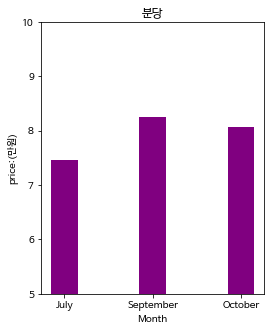

In [ ]:
#한글 안나오면 런타임 다시시작하고 모두실행 하면 한글 다시 됩니다.
plt.figure(figsize=(4,5))
x=['July', 'September', 'October']
y=[7.46, 8.26, 8.06]
plt.bar(x,y, width=0.3, color="purple")
#plt.rc('font', family='NanumGothic')
plt.title('분당')
plt.xlabel("Month")
plt.ylabel("price:(만원)")
axes = plt.gca()
axes.set_ylim([5, 10])
plt.show()